In [5]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# read in data
city_file = "city_data.csv"
ride_file = "ride_data.csv"

city_df = pd.read_csv(city_file)
ride_df = pd.read_csv(ride_file)

# create dataframe that merges the two datasets
merged_df = pd.merge(city_df, ride_df, on = "city")
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [7]:
# identify the unique cities without duplicate data
unique_cities = merged_df.loc[:,["city", "type", "driver_count"]]
unique_cities = unique_cities.drop_duplicates()

# store the average fare by city and the total number of rides for each city using groupby
avg_fare = merged_df.groupby("city").mean()["fare"]
total_rides = merged_df.groupby("city").count()["ride_id"]

# create dataframe that includes all pertinent data
master_df = unique_cities.set_index("city")
master_df ["Total Rides"] = total_rides
master_df ["Average Fare"] = avg_fare

# rename columns and index
master_df = master_df.rename(columns={"type": "Community Type",
                                     "driver_count": "Driver Count"})
master_df.index.names = ["City"]

# format average fare for monetary value
master_df["Average Fare"] = master_df["Average Fare"].map("{:.2f}".format)
master_df["Average Fare"].astype(float)
# display head
master_df.head()

,Community Type,Driver Count,Total Rides,Average Fare
City,,,,
Richardfort,Urban,38,28,22.37
Williamsstad,Urban,59,23,24.36
Port Angela,Urban,67,19,23.84
Rodneyfort,Urban,34,23,28.62
West Robert,Urban,39,31,25.12


([<matplotlib.axis.YTick at 0x27849102b00>,
 <a list of 8 Text yticklabel objects>)

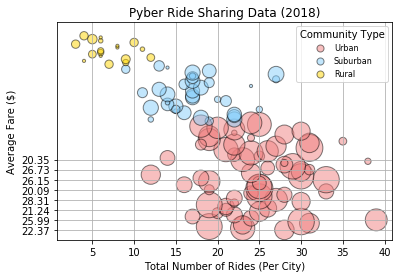

In [25]:
# create unique dataframes for each community type
urban_df = pd.DataFrame(master_df.loc[master_df["Community Type"]=="Urban", :])
suburban_df = pd.DataFrame(master_df.loc[master_df["Community Type"]=="Suburban", :])
rural_df = pd.DataFrame(master_df.loc[master_df["Community Type"]=="Rural", :])

# plot each of the individual dataframes on a scatter plot
# total rides on x axis, avg fare on y axis, size of marker dependent on driver count
# format for color and transparancy. Set labels
plt.scatter(urban_df["Total Rides"], urban_df["Average Fare"], facecolors = "lightcoral", edgecolors = "black", s = urban_df["Driver Count"]*10, alpha = 0.5,  label = "Urban")
plt.scatter(suburban_df["Total Rides"], suburban_df["Average Fare"], facecolors = "lightskyblue", edgecolors = "black", s = suburban_df["Driver Count"]*10, alpha = 0.5, label= "Suburban")
plt.scatter(rural_df["Total Rides"], rural_df["Average Fare"], facecolors = "gold", edgecolors = "black", s = rural_df["Driver Count"]*10, alpha = 0.5, label = "Rural")

# add title, legend, and labels
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# insert legend in upper right corner, add frame and title
key = plt.legend( frameon = True, loc = "upper right", fontsize = 8, title = "Community Type")

# format bubbles in legend to be a uniform size
key.legendHandles[0]._sizes = [50]
key.legendHandles[1]._sizes = [50]
key.legendHandles[2]._sizes = [50]

note = "* Circle size correlates with driver count per city"
# plt.gcf().text(1., 0.4, note)
plt.grid()
min_master= float(master_df["Average Fare"].min())
max_master = float(master_df["Average Fare"].max())+1
plt.yticks(np.arange(0, max_master, step=6.0))
# plt.yticks(step = 5.0)

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

In [ ]:
community_df = merged_df.groupby("type")["type", "fare", "ride_id", "driver_count"]

city_df = community_df.sum()["driver_count"]
labels= city_df.index


plt.pie(labels, explode = explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle= 250)
plt.axis("equal")

In [ ]:
len(merged_df)

In [ ]:
community_df.head()

In [12]:
print(master_df["Average Fare"].min())
print(master_df["Average Fare"].max())

20.09
43.28
